In [22]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

#define constant
theta  = 1.074   #1.074 is magic angle         #degree
omega  = 0.110          #mev
d      = 1.420          #angstrom, whatever is ok.
hv     = 1.5*d*2.8     #meV*angstrom, Fermi velocity for SLG
N      = 11              #truncate range
valley = -1            #+1 for K, -1 for K'


#tune parameters
theta  = theta/180.0*np.pi  
alpha  = 0.005414/np.sin(theta/2)            #obtained after computing w/(vf*k_theta)
hv1    = hv*(1-3*alpha**2)/(1+6*alpha**2)    #renormalized fermi velocity
ei120  = cos(2*pi/3) + valley*1j*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*1j*sin(2*pi/3)

ktheta = 8*np.pi*sin(theta/2)/3/sqrt(3)/d
qb     = ktheta*array([0, 1])
K1     = ktheta*array([sqrt(3)/2,0.5])    #Changed
K2     = ktheta*array([-sqrt(3)/2,0.5])

Tqb    = omega*np.array([[1,1], [1,1]], dtype=complex)
Tqtr   = omega*np.array([[ei120, 1], [ei240, ei120]], dtype=complex)
Tqtl   = omega*np.array([[ei240, 1], [ei120, ei240]], dtype=complex)
TqbD   = np.array(np.matrix(Tqb).H)
TqtrD  = np.array(np.matrix(Tqtr).H)
TqtlD  = np.array(np.matrix(Tqtl).H)

def hk(N,B,qx,qy):
    one_1=Qobj(np.array([[0,0],[1,0]],dtype=complex))
    one_2=Qobj(np.array([[0,1],[0,0]],dtype=complex))
    hk=hv*np.sqrt(2*e*B)*(tensor(destroy(N)+(qx+1j*qy),one_1)+tensor(destroy(N).dag()+(qx-1j*qy),one_2)).full()
    eigenvalue,featurevector=np.linalg.eig(hk)
    eig_vals_sorted = np.sort(eigenvalue)
    return eig_vals_sorted


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


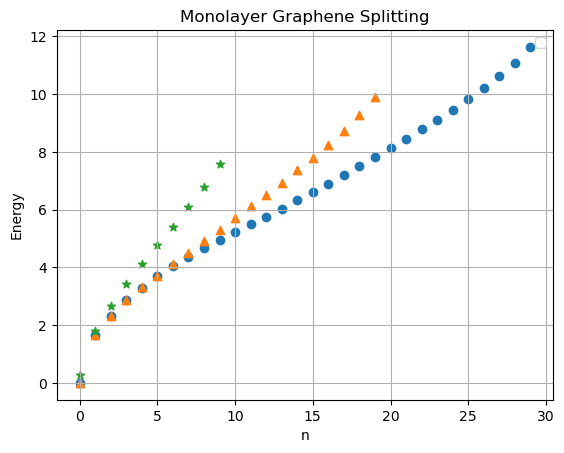

In [26]:
wc=1
B=wc**2/(2*hv**2)


N1=[30,20,10]

mark=['o','^','*']
k=0
for N in N1:
    eigenvalue=hk(N,B,0,0)   #instead of 0 0 put values to obtain for the shifted case
    positive_eigenvalues = [a for a in eigenvalue if a > 0]

    X_range=np.arange(len(positive_eigenvalues))
    
    plt.scatter(X_range, positive_eigenvalues,marker=mark[k])
    k+=1

plt.xlabel('n')
plt.ylabel('Energy')
plt.title(f'Monolayer Graphene Splitting')
plt.legend()
plt.grid(True)
plt.show()